# Matplotlib: An Introduction

[Matplotlib](https://matplotlib.org/index.html) is a library for plots in Python. 

Plots facilitate data visualisation, which is an important way to show your data analysis. 

This notebook introduces basic plots in financial economics.

For more examples, you can refer to [here](https://matplotlib.org/examples/index.html).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## 1. Creat Plots

This section showcases basic tools for graphic representation such as histogram, bar chat, scatter plot, etc. 

We use random numbers in examples. More details about risk and Monte Carlo will be introduced in the future.

In exercises, you may practice plotting with data files.

### 1.1 Histogram and Bar Chart

In [histogram](https://en.wikipedia.org/wiki/Histogram), we usually put continuous numbers in the horizontal axis and frequency in the vertical axis, respectively.

In [bar chart](https://en.wikipedia.org/wiki/Bar_chart), we usually put categories instead of continuous numbers in the horizontal (or vertical) axis.

It is a good way to show the **distribution** of our data. 

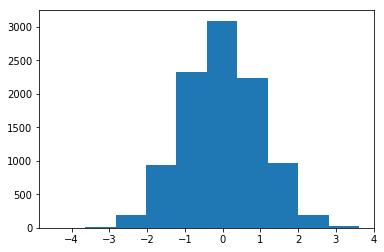

In [2]:
# Example for numerical data.
X = np.random.randn(10000)
plt.hist(X)
plt.show()

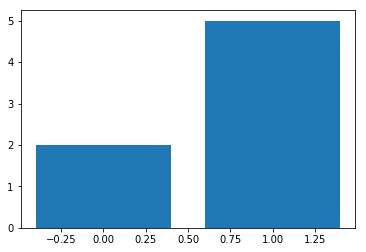

In [4]:
# Example for categorical data.
X2 = range(2)
plt.bar(X2, height= [2,5])
plt.show()


-----------------------
We can choose a different bindwidth, or bin, from the default bin by `hist`.

The larger the bin is, the 'smoothier' the histogram is.

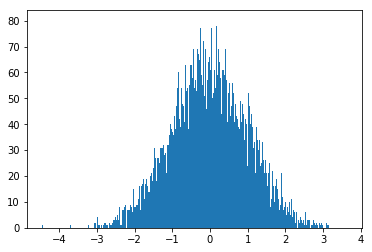

In [6]:
# Example for bin.
plt.hist(X, bins = 500)
plt.show()

---------------
We can also generate bar charts of one variable conditioning on another variable.

In the following example, we summarise the number of (hypothetical) students by their gender.

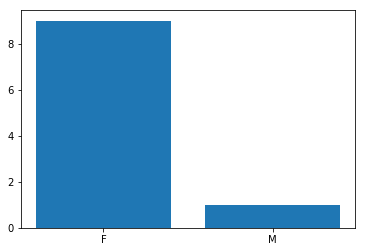

,studentID,gender
0,0,M
1,1,F
2,2,F
3,3,F
4,4,F
5,5,F
6,6,F
7,7,F
8,8,F
9,9,F


In [7]:
raw_data = {'studentID': range(10), 'gender': random.choices(['F','M'], k=10)}
df = pd.DataFrame(raw_data, columns = ['studentID','gender'])

plt.bar(range(2), height = df.groupby('gender').size())
plt.xticks(range(2), ('F', 'M'))
plt.show()
df.head(20)


### 1.2 Scatter Plot and Line Chart

[Scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) shows 'dots' or with one variable as horizontal axis and another variable as vertical axis, respectively.

[Line chart](https://en.wikipedia.org/wiki/Line_chart) depicts 'lines' instead of 'dots'.

It is a good way to show **trend** or **correlation** in your data.

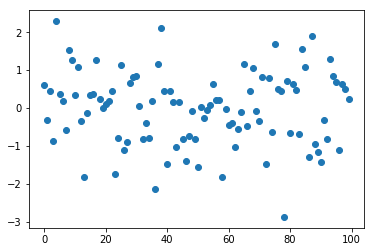

In [8]:
a = range(100)
b = np.random.randn(100)


plt.scatter(a,b)
plt.show()

----------------
You may also change the size or color of 'dots' in scatter plots.

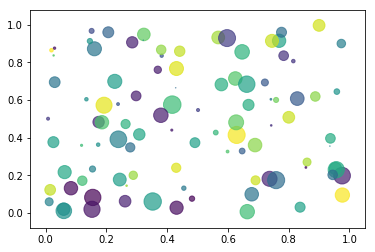

In [9]:
n = 100
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.random.rand(n)
area = np.pi * (10 * np.random.rand(n))**2  # 0 to 10 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.7)
plt.show()
# help(plt.scatter)

------------------------

Line plot has better visual effect for countinuous data.

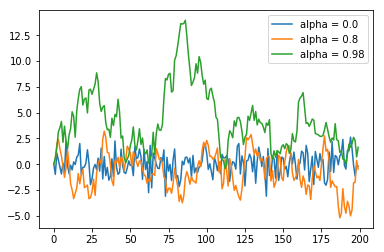

In [10]:
alphas = [0.0, 0.8, 0.98]
ts_length = 200

for alpha in alphas: 
    x_values = [] 
    current_x = 0
    for i in range(ts_length):
        x_values.append(current_x)
        current_x = alpha * current_x + np.random.randn()
    plt.plot(x_values, label='alpha = ' + str(alpha))
plt.legend()
plt.show()

### 1.3 Boxplot

[Boxplot](https://en.wikipedia.org/wiki/Box_plot) is a good way to show **descriptive statistics** of your data.

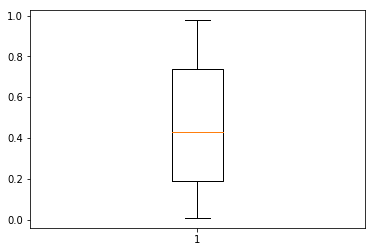

In [11]:
plt.boxplot(x) # x generated above
plt.show()

------------------------
It is very easy to combine multiple boxes.

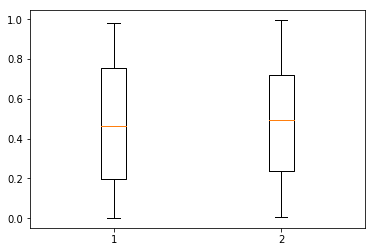

In [11]:
plt.boxplot([x,y]) # x,y generated above
plt.show()

## 2. Modify Plots

A good plot is worth a thousand words

But how to put 'a thousand words' into one plot?

### 2.1 Basic Formatting

We can convey much more information in a plot by *title, legend, label* etc.

You could also find more examples [here](https://plot.ly/python/ipython-notebook-tutorial/).

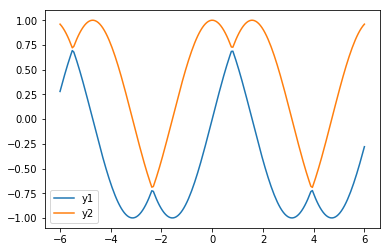

In [12]:
x_lin = np.linspace(-6, 6, 200) #evenly spaced numbers

y1 = np.minimum(np.sin(x_lin), np.cos(x_lin)) #some tricky curves
y2 = np.maximum(np.sin(x_lin), np.cos(x_lin))

fig, ax = plt.subplots() # subplots returns a figure (fig) and 1 ax(es)
ax.plot(x_lin, y1, label='y1') # plots curve to the only axes
ax.plot(x_lin, y2, label='y2')
ax.legend() #add a (default) legend

plt.show()

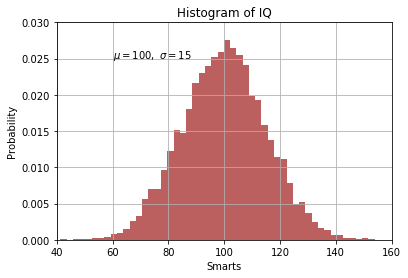

In [13]:
mu= 100
sigma = 15
r = mu + sigma * np.random.randn(10000)

# the histogram of the data
# plt.hist returns the values used in making the histogram, i.e.
#n, bins, patches = plt.hist(r, 50, normed=1, facecolor='brown', alpha=0.75)
plt.hist(r, 50, normed=1, facecolor='brown', alpha=0.75) # normed is one way of getting a density, alpha is tranparency

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

----------------------
There is also a beautiful [example](http://matplotlib.org/examples/showcase/bachelors_degrees_by_gender.html) of line charts by categories.

### 2.2 Multiple Plots (Advanced)

Sometimes you may find multiple plots very useful. Let's explore several examples.

-------------------
We can use subplots to present separate plots at the same time.

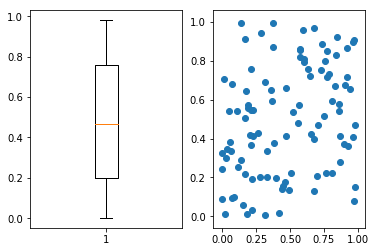

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False) # 1 x 2 pairs of axes
ax1.boxplot(x)
ax2.scatter(x, y)
plt.show()

### Too Advanced for Today
Suppose that you would like to show both distribution and descriptive statistics of ages of (hypothetical) students by gender.

We can combine the scatter plot and boxplot.

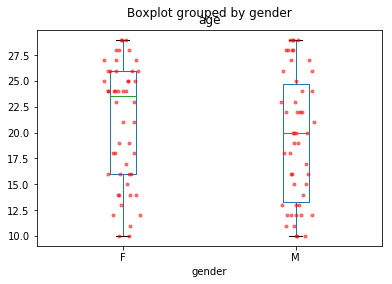

In [15]:
raw_data = {'age': np.random.randint(10, 30, 100), 'gender': random.choices(['F','M'], k=100)}
data = pd.DataFrame(raw_data, columns = ['age','gender'])

bp = data.boxplot(column='age', by='gender', grid=False)
sex = ['F','M']
for i in range(2):
    y_age = data.age[data.gender==sex[i]]
    # Add some random "jitter" to the x-axis
    x_age = np.random.normal(i+1, 0.05, len(y_age))
    plt.plot(x_age, y_age, 'r.', alpha=0.5)
plt.show()

## 3. Save Plots

### Basics
It is always important to save your work.

Similar to data files, there are many formats of plot files.

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.boxplot(x)
ax2.scatter(x, y)

plt.savefig('plot.png') #png format to import to word processor
plt.savefig('plotftp.pdf') #pdf

------------------
### Advanced
We can also save multiple plots into one pdf.

In [20]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('multipage.pdf')

raw_data = {'age': np.random.randint(10, 30, 100), 'gender': random.choices(['F','M'], k=100)}
data = pd.DataFrame(raw_data, columns = ['age','gender'])

bp = data.boxplot(column='age', by='gender', grid=False)
sex = ['F','M']
for i in range(2):
    y_age = data.age[data.gender==sex[i]]
    # Add some random "jitter" to the x-axis
    x_age = np.random.normal(i+1, 0.05, len(y_age))
    plt.plot(x_age, y_age, 'r.', alpha=0.5)

plt.savefig(pp, format='pdf')

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.boxplot(x)
ax2.scatter(x, y)

plt.savefig(pp, format='pdf')

pp.close() # Finally, we must close it.
